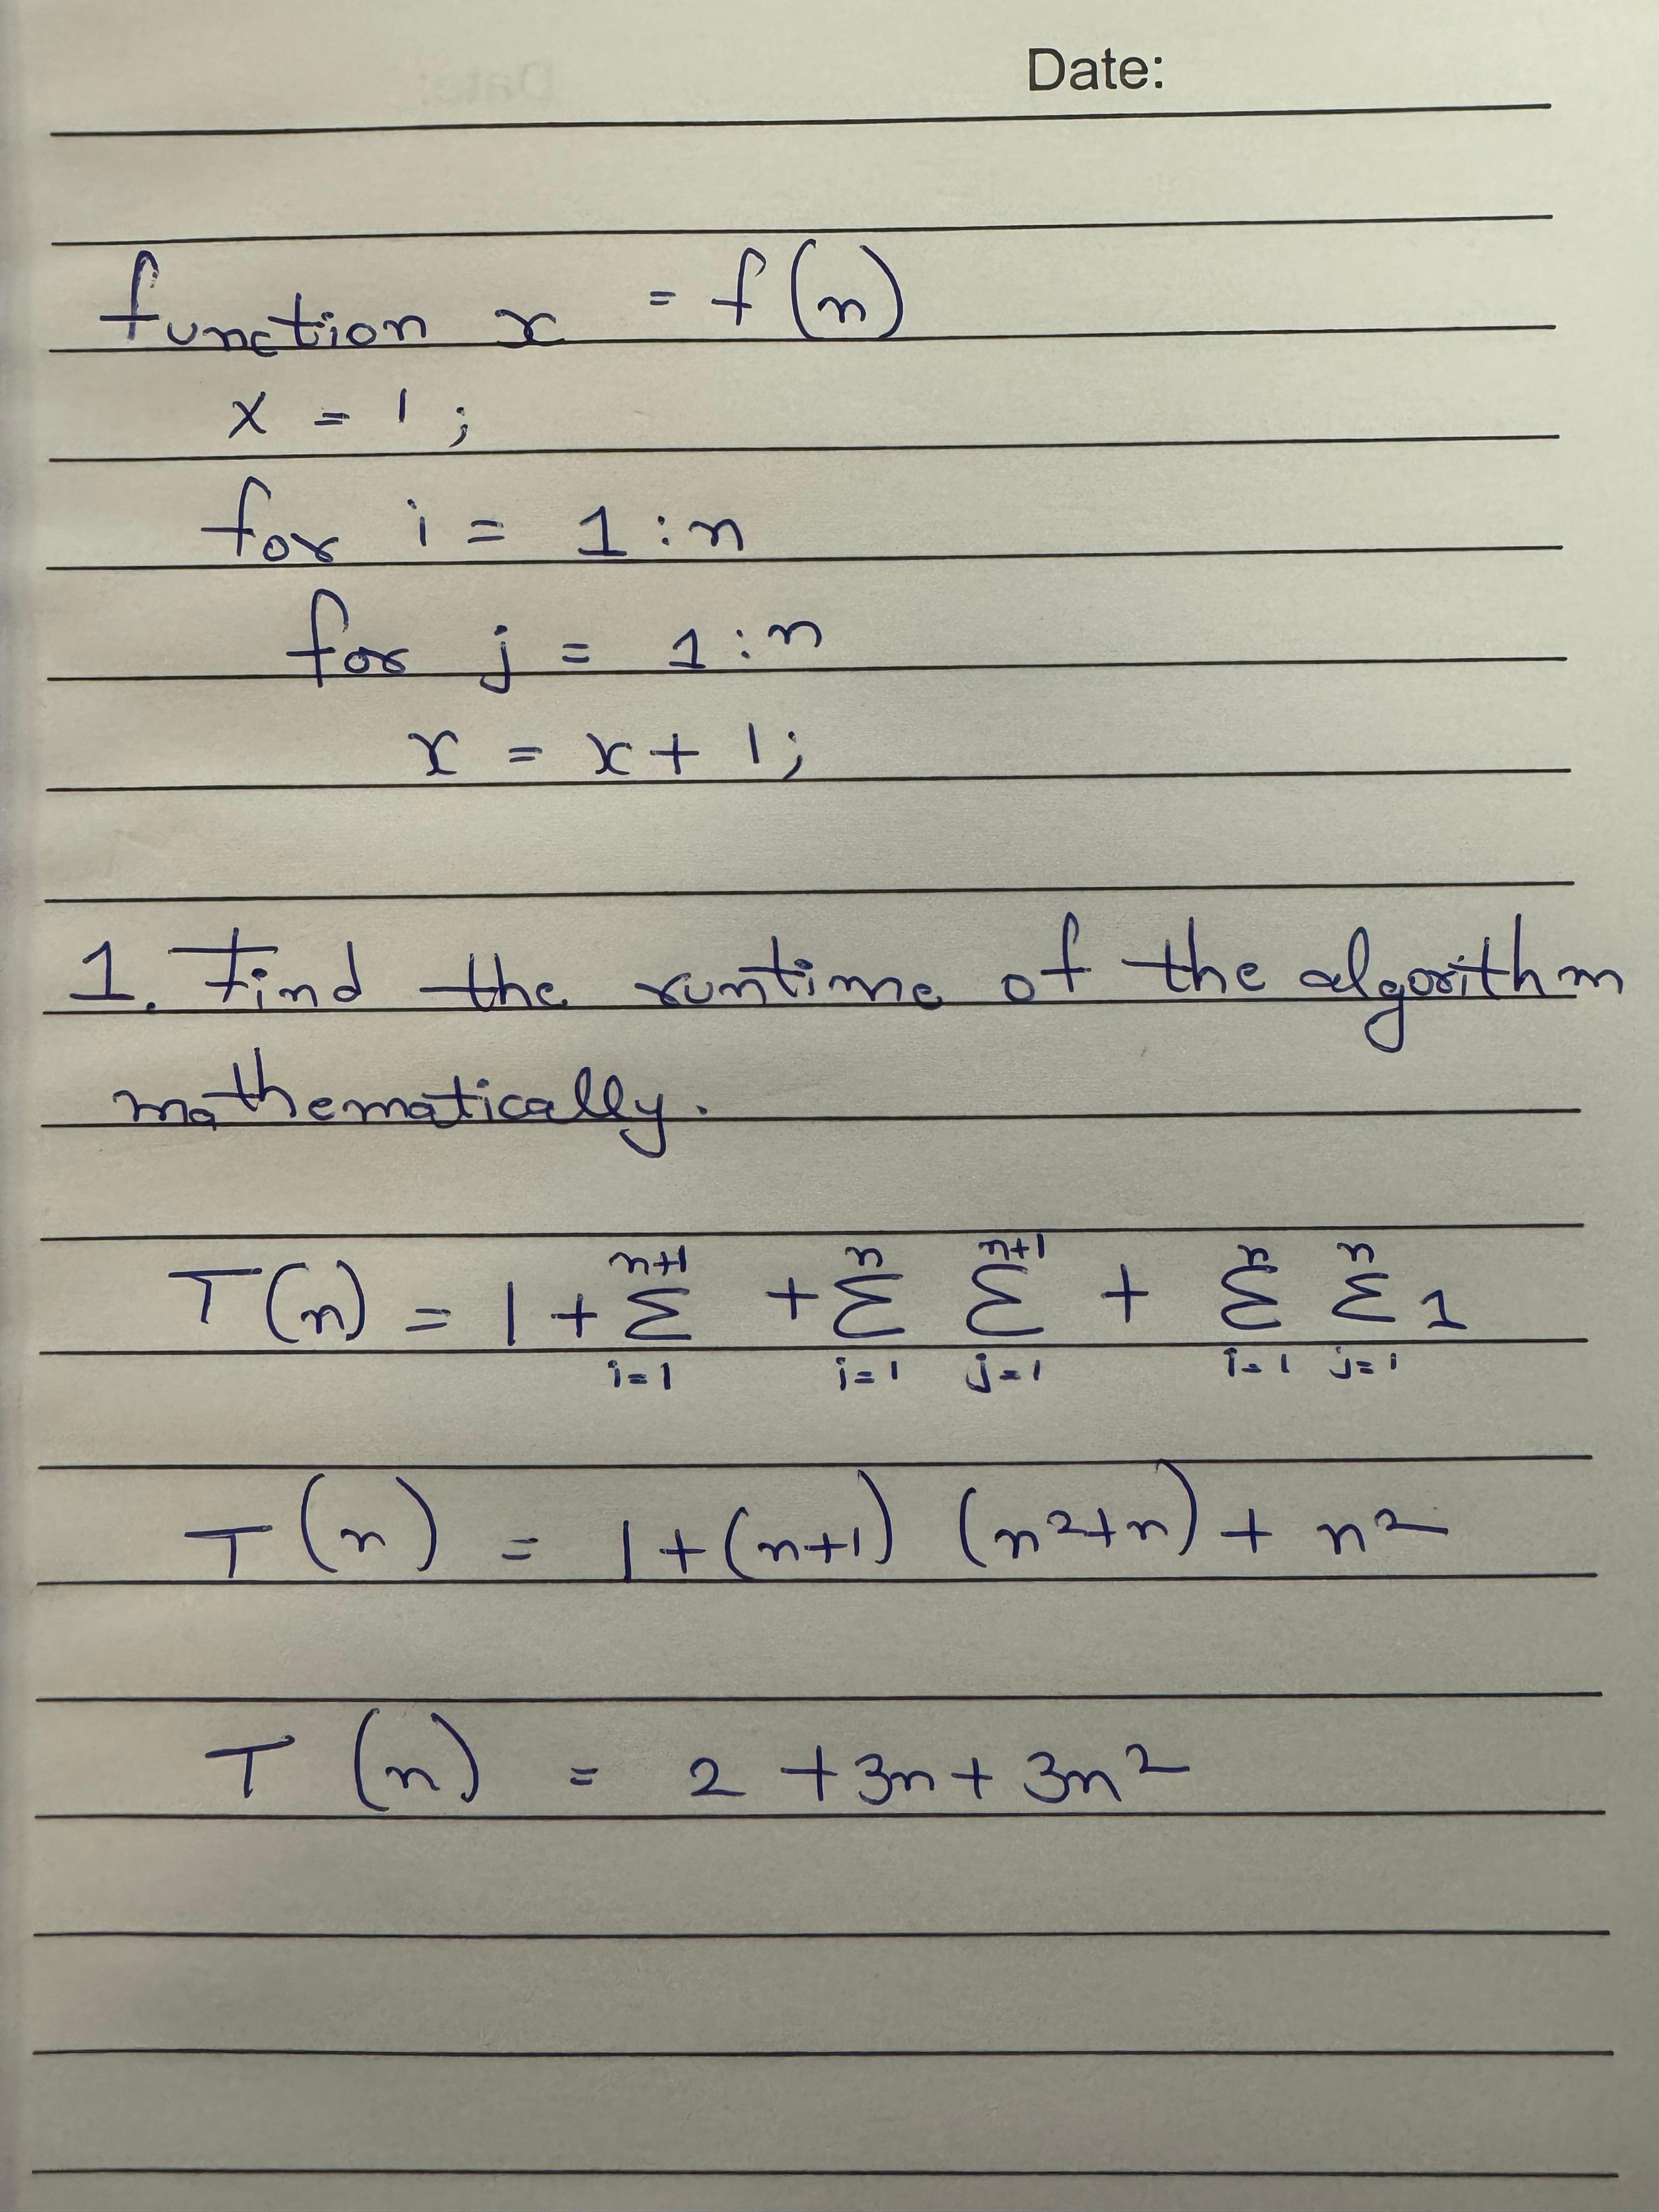

In [2]:
from IPython import display
display.Image("/content/TimeComplexity.jpg")

n	T(n)
1	8
2	20
3	38
4	62
5	92
6	128
7	170
8	218
9	272
10	332
50	7652
100	30302
500	751502
1000	3003002
5000	75015002
10000	300030002


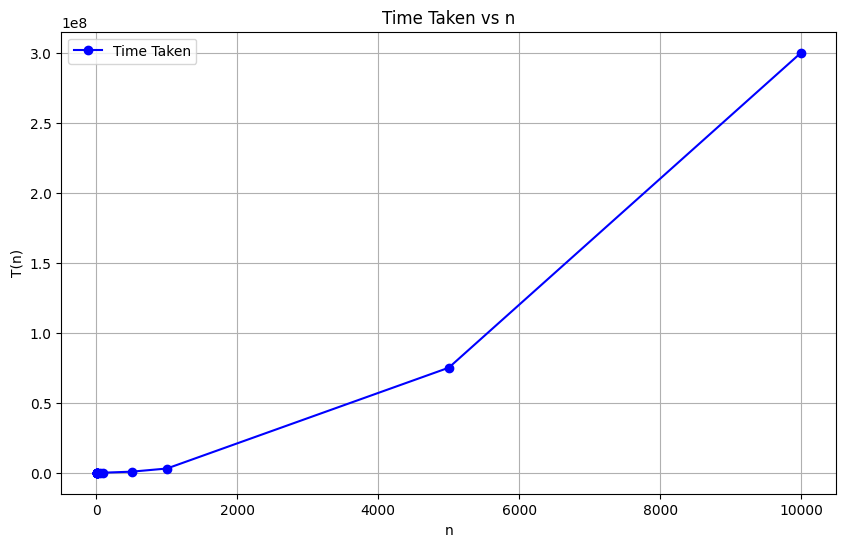

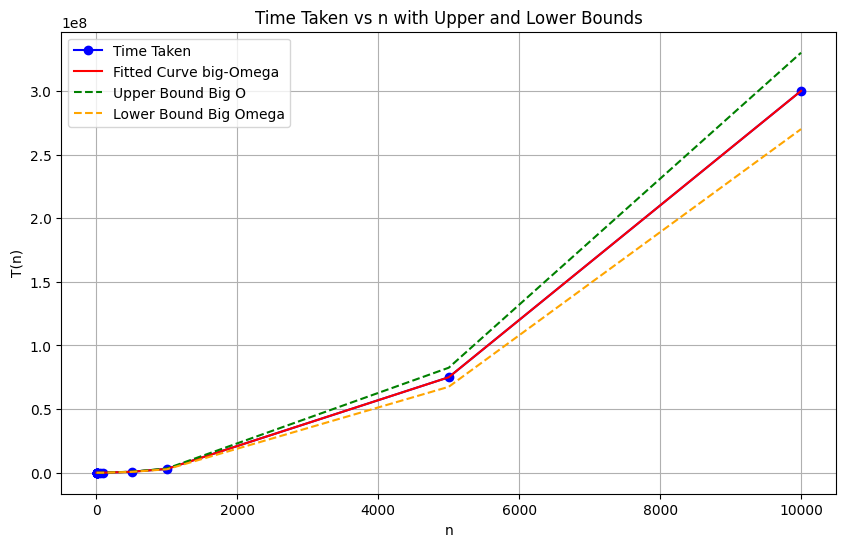

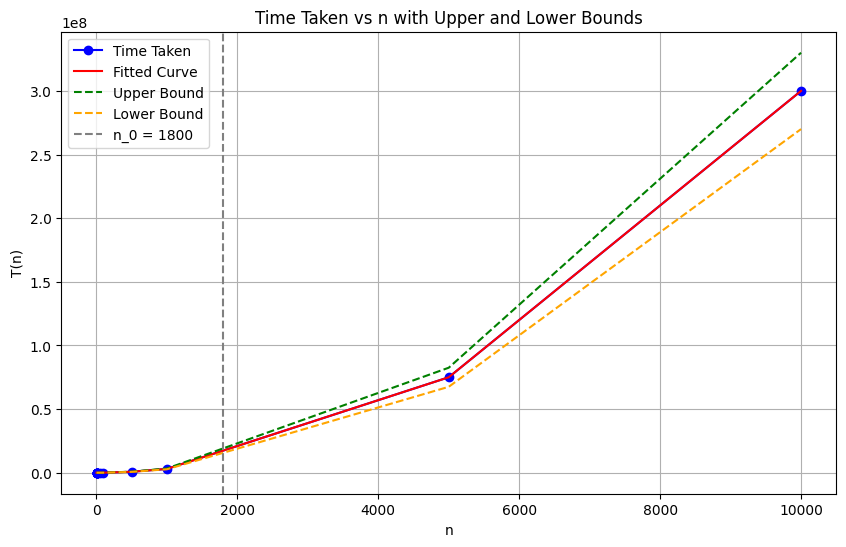

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit




def T(n):
    return 2 + 3 * n + 3 * n**2

# Time the function for various values of n
n_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50 , 100, 500, 1000, 5000, 10000]
data = []

for n in n_values:  # Adjust as needed
    data.append((n, T(n)))

print("n\tT(n)")
for n, T_n in data:
    print(f"{n}\t{T_n}")
    n_values, times = zip(*data)


# Question 2: Time this function for various n e.g. n = 1,2,3.... You should have small values of n all the way up to large values. Plot "time" vs "n" (time on y-axis and n on x-axis). Also, fit a curve to your data, hint it's a polynomial.
plt.figure(figsize=(10, 6))
plt.plot(n_values, times, label='Time Taken', color='blue', marker='o', linestyle='-')
plt.xlabel('n')
plt.ylabel('T(n)')
plt.title('Time Taken vs n')
plt.grid(True)
plt.legend()
plt.show()










# Question 3: Find polynomials that are upper and lower bounds on your curve from #2. From this specify a big-O, a big-Omega, and what big-theta is.
degree = 2  # Polynomial degree
coefficients = np.polyfit(n_values, times, degree)
fitted_curve = np.poly1d(coefficients)

# Determine big-O, big-Omega, and big-theta notations
upper_coefficients = coefficients * 1.1  # Adjust multiplier as needed
lower_coefficients = coefficients * 0.9  # Adjust multiplier as needed
upper_bound = np.poly1d(upper_coefficients)
lower_bound = np.poly1d(lower_coefficients)










# Question 4: Find the approximate (eye ball it) location of "n_0" . Do this by zooming in on your plot and indicating on the plot where n_0 is and why you picked this value. Hint: I should see data that does not follow the trend of the polynomial you determined in #2.
plt.figure(figsize=(10, 6))
plt.plot(n_values, times, label='Time Taken', color='blue', marker='o', linestyle='-')
plt.plot(n_values, fitted_curve(n_values), label='Fitted Curve big-Omega', color='red')

plt.plot(n_values, upper_bound(n_values), label='Upper Bound Big O', color='green', linestyle='--')
plt.plot(n_values, lower_bound(n_values), label='Lower Bound Big Omega', color='orange', linestyle='--')

plt.xlabel('n')
plt.ylabel('T(n)')
plt.title('Time Taken vs n with Upper and Lower Bounds')
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(n_values, times, label='Time Taken', color='blue', marker='o', linestyle='-')
plt.plot(n_values, fitted_curve(n_values), label='Fitted Curve', color='red')

plt.plot(n_values, upper_bound(n_values), label='Upper Bound', color='green', linestyle='--')
plt.plot(n_values, lower_bound(n_values), label='Lower Bound', color='orange', linestyle='--')


n_0 = 1800
plt.axvline(x=n_0, color='gray', linestyle='--', label=f'n_0 = {n_0}')

plt.xlabel('n')
plt.ylabel('T(n)')
plt.title('Time Taken vs n with Upper and Lower Bounds')
plt.grid(True)
plt.legend()
plt.show()

4. Will this increate how long it takes the algorithm to run (e.x. you are timing the function like in #2)?

A little runtime increase is introduced when the assignment procedure y = i + j; is added to the function's nested loops. The constant-time procedure that assigns the total of i and j to y for each iteration is the cause of this. Though this extra step increases the total time required for each iteration, its effect is still negligible in comparison to the main driver, the nested loop structure.

Let's examine the temporal complexity analysis of the original function to get more specifics. The nested loop structure of the original technique, where n is the input size, results in a time complexity of O(n^2). In algorithmic analysis, the nested loops each iterate n times, for a total of n * n = n^2.

Now that the assignment instruction y = i + j; has been added, the extra computational overhead is constant for every iteration. It does not significantly change the time complexity of the algorithm, although it does slightly raise the overall time each iteration. Nested loops continue to be the key factor influencing the algorithm's runtime; they still execute n^2 times.

Thus, the overall time complexity of the method stays O(n^2) even though the addition of the assignment operation y = i + j; somewhat increases the runtime due to the added computational cost per iteration. Essentially, this extra operation has very little effect in comparison to the stacked loops' dominating component, which confirms the algorithm's quadratic time complexity.






5. Will it effect your results from #1?

The modification changes the number of operations in each iteration but doesn't change the overall time complexity, which remains O(n²)

In [3]:
# 6. Implement merge sort, upload your code to github and show/test it on the array [5,2,4,7,1,3,2,6].




def merge(arr, left, mid, right):
    n1 = mid - left + 1
    n2 = right - mid

    # Create temp arrays
    L = [0] * n1
    R = [0] * n2

    # Copy data to temp arrays L[] and R[]
    for i in range(n1):
        L[i] = arr[left + i]
    for j in range(n2):
        R[j] = arr[mid + 1 + j]

    i = 0  # Initial index of first subarray
    j = 0  # Initial index of second subarray
    k = left  # Initial index of merged subarray

    # Merge the temp arrays back
    # into arr[left..right]
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    # Copy the remaining elements of L[],
    # if there are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    # Copy the remaining elements of R[],
    # if there are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

def merge_sort(arr, left, right):
    if left < right:
        mid = (left + right) // 2

        merge_sort(arr, left, mid)
        merge_sort(arr, mid + 1, right)
        merge(arr, left, mid, right)

def print_list(arr):
    for i in arr:
        print(i, end=" ")
    print()

# Driver code
if __name__ == "__main__":
    arr = [5,2,4,7,1,3,2,6]
    print("Given array is")
    print_list(arr)

    merge_sort(arr, 0, len(arr) - 1)

    print("\nSorted array is")
    print_list(arr)


Given array is
5 2 4 7 1 3 2 6 

Sorted array is
1 2 2 3 4 5 6 7 
